## Import all the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ignore warnings improve output display

In [4]:
import warnings 
warnings.filterwarnings('ignore') 

# Read data

In [7]:
data_orig = pd.read_csv(r"C:\Users\radha\DS_Geethika_ma'am\datasets\data_clean.csv")

In [8]:
data = data_orig.copy()

### Examine Data

In [11]:
data.shape

(158, 9)

In [12]:
data.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp C', 'Month', 'Day', 'Year', 'Temp',
       'Weather'],
      dtype='object')

In [13]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


In [14]:
data.tail()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S
157,18.0,131.0,8.0,76,9,29,2010,76,C


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


+ Columns having null values :- 1. Ozone 2. Solar.R 3. Weather

+ Columns having improper data types :- 1. Temp C 2. Month 3. Weather

In [18]:
data['Weather'].value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

## a. Convert to proper data type 

In [19]:
data['Temp C'] = pd.to_numeric(data['Temp C'], errors = 'coerce')

In [20]:
data['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [23]:
data['Month'] = pd.to_numeric(data['Month'], errors = 'coerce')

In [24]:
data['Weather'] = data['Weather'].astype('category')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


## b. Remove unwanted columns 

+ Check whether the probable duplicate columns are having any unique value

In [29]:
data[data['Temp C'] != data['Temp']]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
10,7.0,NaN,6.9,NaN,5.0,11,2010,74,C


In [30]:
data.drop('Temp C',axis =1 , inplace = True)

In [31]:
data.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

In [32]:
data['Year'].unique()

array([2010], dtype=int64)

In [33]:
data['Year'].nunique()

1

In [34]:
data.drop('Year',axis = 1, inplace = True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Month    157 non-null    float64 
 4   Day      158 non-null    int64   
 5   Temp     158 non-null    int64   
 6   Weather  155 non-null    category
dtypes: category(1), float64(4), int64(2)
memory usage: 7.8 KB


## c. Handle Duplicates

In [36]:
data.duplicated().value_counts()

False    157
True       1
dtype: int64

+ Check the duplicatre entries in the column 

In [38]:
data[data.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
150,14.0,191.0,14.3,9.0,28,75,S
156,14.0,191.0,14.3,9.0,28,75,S


In [39]:
data.drop_duplicates(inplace = True)

In [40]:
data.duplicated().value_counts()

False    157
dtype: int64

## d. Rename coluns 

In [41]:
data.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Month', 'Day', 'Temp', 'Weather'], dtype='object')

In [42]:
data.rename(columns = {'Solar.R':'Solar'}, inplace = True)

In [43]:
data.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temp', 'Weather'], dtype='object')

### e. Handle Missing values 

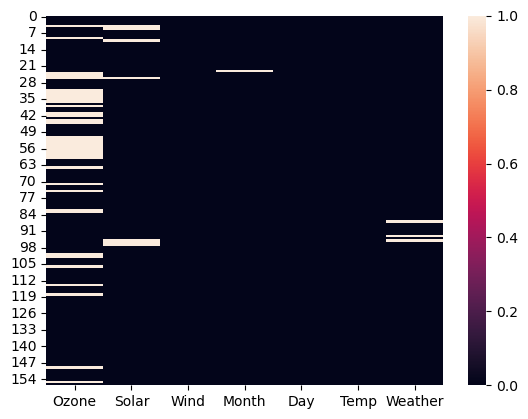

In [44]:
sns.heatmap(data.isnull())
plt.show()

In [45]:
data['Weather'].mode()

0    S
Name: Weather, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [46]:
data.fillna({'Ozone':data['Ozone'].mean(),
             'Solar':data['Solar'].mean(),
             'Weather':data['Weather'].mode()[0]
            },
           inplace = True)

In [47]:
data.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Temp       0
Weather    0
dtype: int64

In [48]:
data.dropna(inplace = True)

In [49]:
data.shape

(156, 7)

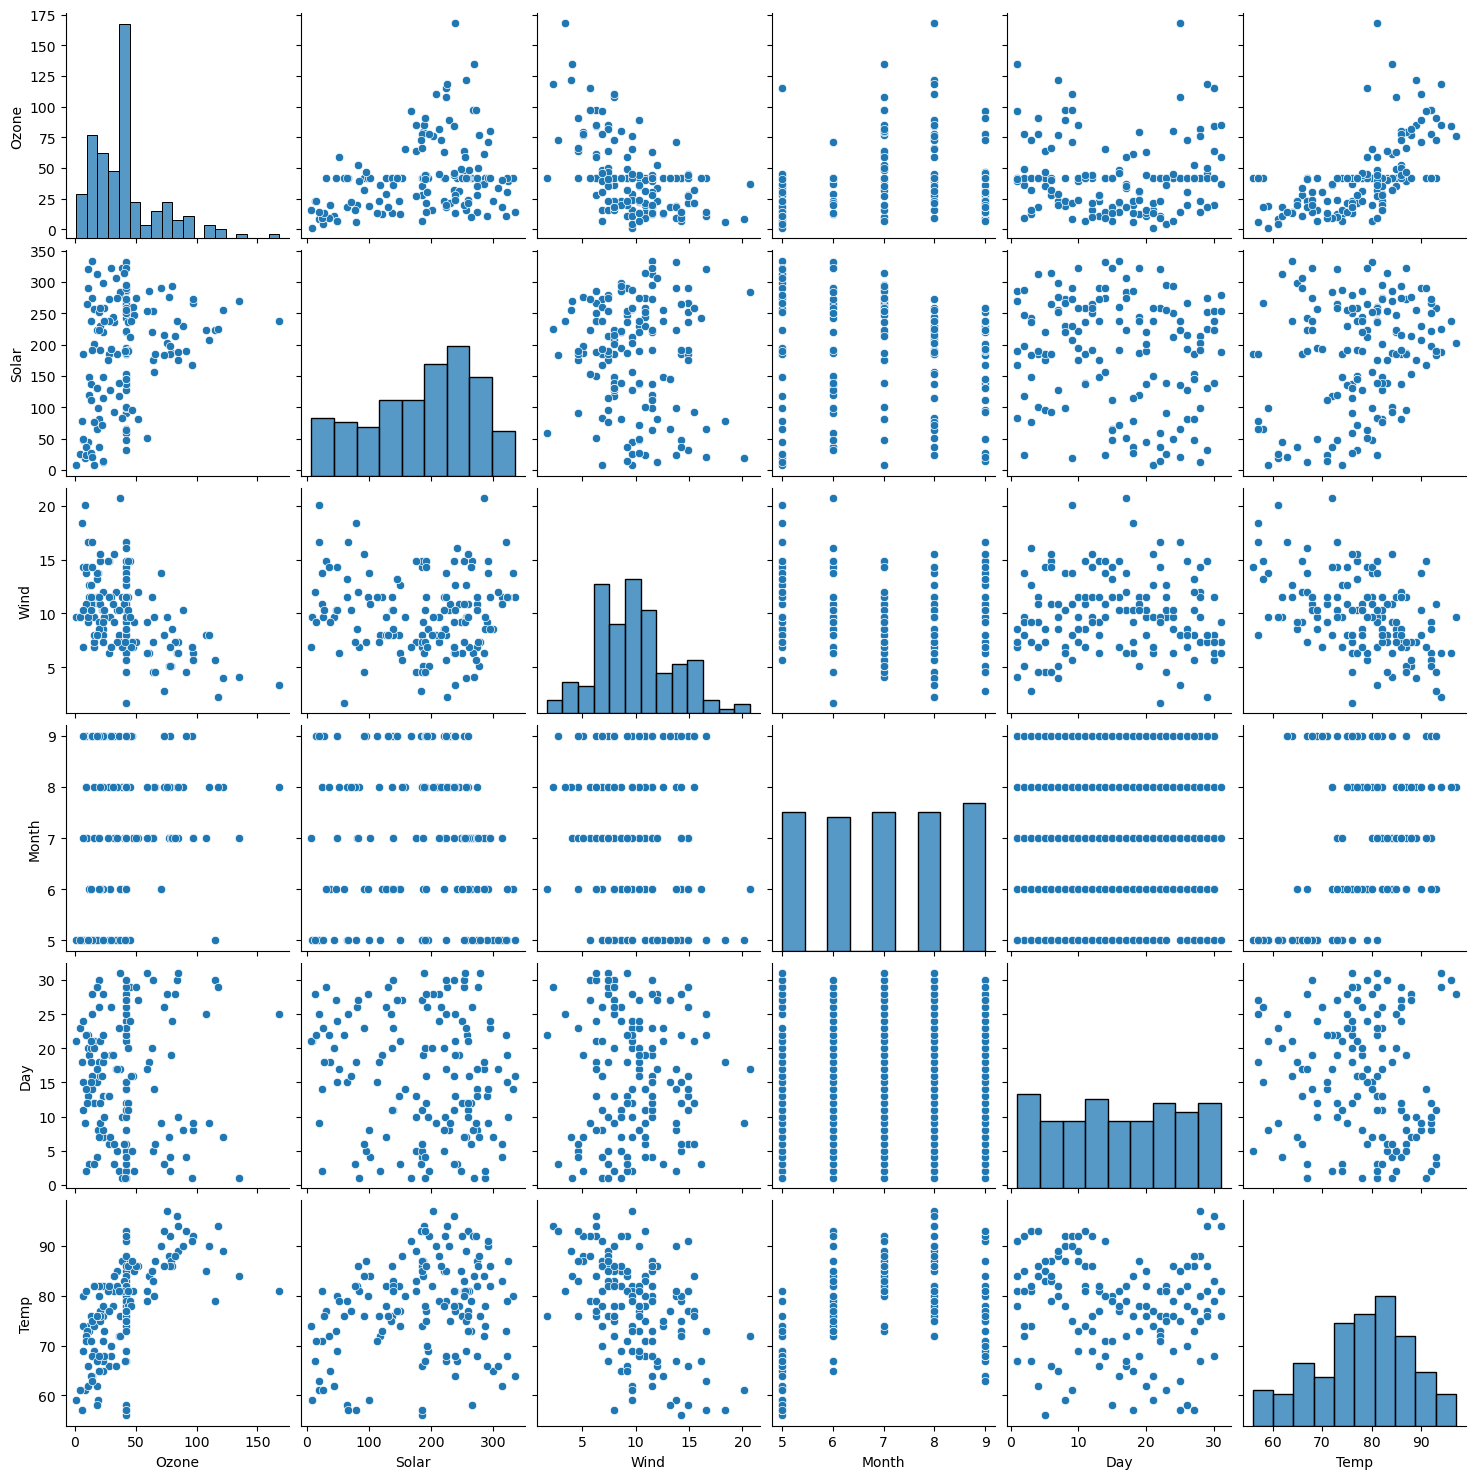

In [50]:
sns.pairplot(data,palette = 'viridis' )
plt.show()

In [51]:
data.corr()

,Ozone,Solar,Wind,Month,Day,Temp
Ozone,1.000000,0.303412,-0.519472,0.132860,-0.019971,0.609022
Solar,0.303412,1.000000,-0.052037,-0.090902,-0.145703,0.251867
Wind,-0.519472,-0.052037,1.000000,-0.166216,0.026573,-0.439451
Month,0.132860,-0.090902,-0.166216,1.000000,0.050055,0.398516
Day,-0.019971,-0.145703,0.026573,0.050055,1.000000,-0.113924
Temp,0.609022,0.251867,-0.439451,0.398516,-0.113924,1.000000


In [52]:
corr_mat = data._get_numeric_data().corr()

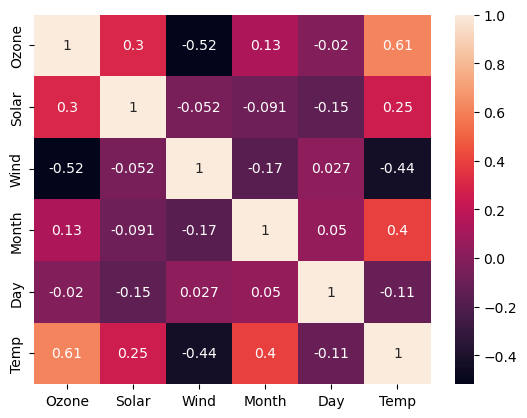

In [53]:
sns.heatmap(corr_mat, annot= True)
plt.show()

### Preliminary quick view of Data

In [54]:
## One time thing 
#!pip install sweetviz
# !pip install ydata_profiling

In [55]:
# import ydata_profiling as pp 
# import sweetviz as sv

In [66]:
# EDA_report = pp.ProfileReport(data_orig)
# EDA_report.to_file(output_file = 'report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
# sweet_report = sv.analyze(data_orig)
# sweet_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
